In [ ]:
# clean the current working directory
! cd /content
! rm -r *

## Introduction
In this notebook, we are developing a machine learning model that can classify some birds that are commonly spotted in the Netherlands. We have the following requirements for the model:
*   our model can classify images of commonly spotted birds
*   our model can classify images that do not show a bird as "no bird"
*   our model is developed using transfer learning.
*   our model achieves an accuracy of 95 percent or higher on classifying if it is a bird within the test set.
*   our model achieves an accuracy of ?? percent or higher on classifying the bird species within the test set.

We follow the following structure to develop our model:
1. Select a bird image dataset
2. select a no bird image dataset
3. load in and split the data
5. select an open machine learning model for image classification
6. load the model and freeze hidden layers
5. apply transfer learning on said model using our dataset
6. test the accuracy of the trained model
7. if requirements are met, save the model to be used in our project

# 1. Bird image dataset

We have selected an open dataset of bird images with their species as a
class. The bird dataset can be found [here](https://www.kaggle.com/datasets/davemahony/20-uk-garden-birds/). The dataset contains images of birds from 20 species that are commonly found in the UK. This is relevant to us because birds that are common in the UK overlap with the birds that are commonly spotted in The Netherlands.

# 2. No bird image dataset

We have also selected an open dataset of tree images. The tree dataset can be found [here](https://www.kaggle.com/datasets/bryanb/forests-trees-and-leaves), the house dataset [here](https://www.kaggle.com/datasets/balraj98/facades-dataset) and the grass field dataset [here](https://www.kaggle.com/datasets/usharengaraju/grassclover-dataset). This is relevant to us because we want to train the machine learning model such that it can also classify and image as "No bird".

# 3. Load and split the data

Now that we have relevant image data, we load this data into our workspace and split it into a train, validation, and test set. We add the "No bird" class to the data that was discussed in part 2.

We want a good distribution of images per class after splitting the data. We want to split the images such that the ratio of images per class is the same in every set. So if we apply a 80-10-10 split, then we want 80 percent of the images per class in the training set, 10 percent of the images per class in the validation set, and 10 percent of the images per class in the test set.

In [ ]:
!pip install --user kaggle # was -q, nu --user want hij deed t niet

from google.colab import files
files.upload()

! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

import kaggle

Saving kaggle.json to kaggle.json


## Loading the bird dataset

In [ ]:
! kaggle datasets download -d davemahony/20-uk-garden-birds

! rm -r bird_data

! mkdir bird_data

! unzip -q 20-uk-garden-birds.zip -d bird_data

! ls bird_data -all

 98% 372M/378M [00:05<00:00, 75.2MB/s]
100% 378M/378M [00:05<00:00, 70.0MB/s]
rm: cannot remove 'bird_data': No such file or directory
total 884
drwxr-xr-x  4 root root   4096 Nov  1 14:21 .
drwxr-xr-x  1 root root   4096 Nov  1 14:21 ..
-rw-r--r--  1 root root 865711 Jul 23 10:42 birds.csv
-rw-r--r--  1 root root  15095 Jul 23 10:42 stats.xlsx
drwxr-xr-x 22 root root   4096 Nov  1 14:21 withBackground
drwxr-xr-x 22 root root   4096 Nov  1 14:21 withoutBackground


## Loading the leaf dataset

In [ ]:
! kaggle datasets download -d alexo98/leaf-detection

! rm -r leaf_data

! mkdir leaf_data

! unzip -q leaf-detection.zip -d leaf_data

! ls leaf_data -all

 83% 82.0M/98.3M [00:01<00:00, 80.8MB/s]
100% 98.3M/98.3M [00:01<00:00, 71.0MB/s]
rm: cannot remove 'leaf_data': No such file or directory
total 288
drwxr-xr-x 4 root root   4096 Nov  1 14:22 .
drwxr-xr-x 1 root root   4096 Nov  1 14:22 ..
drwxr-xr-x 3 root root   4096 Nov  1 14:22 test
drwxr-xr-x 2 root root  36864 Nov  1 14:22 train
-rw-r--r-- 1 root root 240282 Jun 22  2020 train.csv


## Loading the house dataset

In [ ]:
! kaggle datasets download -d balraj98/facades-dataset

! rm -r house_data

! mkdir house_data

! unzip -q facades-dataset.zip -d house_data

! ls house_data -all

 89% 30.0M/33.5M [00:00<00:00, 112MB/s] 
100% 33.5M/33.5M [00:00<00:00, 106MB/s]
rm: cannot remove 'house_data': No such file or directory
total 92
drwxr-xr-x 6 root root  4096 Nov  1 14:22 .
drwxr-xr-x 1 root root  4096 Nov  1 14:22 ..
-rw-r--r-- 1 root root 49004 Oct 17  2020 metadata.csv
drwxr-xr-x 2 root root  4096 Nov  1 14:22 testA
drwxr-xr-x 2 root root  4096 Nov  1 14:22 testB
drwxr-xr-x 2 root root 12288 Nov  1 14:22 trainA
drwxr-xr-x 2 root root 12288 Nov  1 14:22 trainB


## Loading the grass dataset

In [ ]:
! kaggle datasets download -d usharengaraju/grassclover-dataset

! rm -r grass_data

! mkdir grass_data

! unzip -q grassclover-dataset.zip -d grass_data

! ls grass_data -all

 99% 2.03G/2.04G [00:26<00:00, 104MB/s] 
100% 2.04G/2.04G [00:27<00:00, 80.8MB/s]
rm: cannot remove 'grass_data': No such file or directory
total 16
drwxr-xr-x 3 root root 4096 Nov  1 14:22 .
drwxr-xr-x 1 root root 4096 Nov  1 14:22 ..
drwxr-xr-x 4 root root 4096 Nov  1 14:22 biomass_data


In [ ]:
! rm -r data

! mkdir data

rm: cannot remove 'data': No such file or directory


In [ ]:
import os
import shutil

In [ ]:
# Source directory
src_dir = "./bird_data/withBackground/"

# Destination directory
dest_dir = "./data/"

# Walk and move files from the source to destination directory with their new name
for root, dirs, files in os.walk(src_dir):
    for dir in dirs:
        try:
            shutil.rmtree(f"./data/{dir.replace('_', '')}", )
        except OSError:
            pass
        os.mkdir(f"./data/{dir.replace('_', '')}")
        for file in os.listdir(root + "/" + dir + "/"):
            src_file = os.path.join(root, dir, file)
            dest_file = os.path.join(dest_dir, dir.replace('_',''), file.replace('(','').replace(')',''))
            shutil.copy(src_file, dest_file)

## Moving and renaming the tree, house, and grass data

In [ ]:
try:
    shutil.rmtree("./data/NoBird")
except OSError:
    pass
os.mkdir("./data/NoBird")

In [ ]:
# Source directory
src_dir = "./leaf_data/train/"

# Destination directory
dest_dir = "./data/"

# Walk and move files from the source to destination directory with their new name
for (i,filename) in enumerate(os.listdir(src_dir),1):
    if i < 51:
        src_path = os.path.join(src_dir, filename)
        dest_path = os.path.join(dest_dir, "NoBird", f"{i}.jpg")
        shutil.copy(src_path, dest_path)

In [ ]:
# Source directory
src_dir = "./house_data/trainA/"

# Destination directory
dest_dir = "./data/"

# Walk and move files from the source to destination directory with their new name
for (i, filename) in enumerate(os.listdir(src_dir), 151):
    if i < 101:
        src_path = os.path.join(src_dir, filename)
        dest_path = os.path.join(dest_dir, "NoBird", f"{i}.jpg")
        shutil.copy(src_path, dest_path)

In [ ]:
# Source directory
src_dir = "./grass_data/biomass_data/test/images/"

# Destination directory
dest_dir = "./data/"

# Walk and move files from the source to destination directory with their new name
for (i, filename) in enumerate(os.listdir(src_dir), 301):
    if i < 151:
        src_path = os.path.join(src_dir, filename)
        dest_path = os.path.join(dest_dir, "NoBird", f"{i}.jpg")
        shutil.copy(src_path, dest_path)

In [ ]:
import os

# Directory path
directory = "./data/"

# Initialize a dictionary to store directory counts
directory_counts = {}

# Iterate through the subdirectories
for subdirectory in os.listdir(directory):
    subdirectory_path = os.path.join(directory, subdirectory)

    if os.path.isdir(subdirectory_path):
        num_files = len(os.listdir(subdirectory_path))
        directory_counts[subdirectory] = num_files

# Print the directory counts
for directory, count in directory_counts.items():
    print(f"Directory '{directory}' contains {count} files.")

# Total count of unique directories
total_directories = len(directory_counts)
print(f"Total unique directories: {total_directories}")

Directory 'FeralPigeon' contains 93 files.
Directory 'LongTailedTit' contains 150 files.
Directory 'NoBird' contains 50 files.
Directory 'CoalTit' contains 144 files.
Directory 'Wren' contains 150 files.
Directory 'HouseSparrow' contains 150 files.
Directory 'Bluetit' contains 150 files.
Directory 'Goldfinch' contains 150 files.
Directory 'WoodPigeon' contains 150 files.
Directory 'Blackbird' contains 150 files.
Directory 'SongThrush' contains 150 files.
Directory 'CarrionCrow' contains 131 files.
Directory 'Greenfinch' contains 150 files.
Directory 'CollaredDove' contains 150 files.
Directory 'GreatTit' contains 150 files.
Directory 'Dunnock' contains 150 files.
Directory 'Magpie' contains 92 files.
Directory 'Chaffinch' contains 150 files.
Directory 'Robin' contains 150 files.
Directory 'Jackdaw' contains 131 files.
Directory 'Starling' contains 150 files.
Total unique directories: 21


## Splitting the data into train, validation, and test sets

In [ ]:
try:
    shutil.rmtree("./split_data")
except OSError:
    pass
os.mkdir("./split_data")

NameError: ignored

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
def split_data(ratio = (0.8, 0.1, 0.1)):
    src_dir = "./data/"
    dest_dir = "./split_data/"

    classes = os.listdir(src_dir)

    for class_name in classes:
        class_folder = os.path.join(src_dir, class_name)
        images = os.listdir(class_folder)

        train_images, temp_images = train_test_split(images, test_size=(ratio[1] + ratio[2]))
        val_images, test_images = train_test_split(temp_images, test_size=ratio[2] / (ratio[1] + ratio[2]))

        for dataset, dataset_name in zip([train_images, val_images, test_images], ["train", "val", "test"]):
            dataset_folder = os.path.join(dest_dir, dataset_name, class_name)
            os.makedirs(dataset_folder, exist_ok=True)

            for image in dataset:
                source_path = os.path.join(class_folder, image)
                destination_path = os.path.join(dataset_folder, image)
                shutil.copy(source_path, destination_path)

    print("Data split completed.")

split_data()

Data split completed.


## Augmenting our training and validation sets

We want to develop a powerful image classification model using our few training and validation examples. That is why we have decided to augment them using Keras' ImageDataGenerator class. The images are augmented with a number of random transformations, so that our model would never see twice the exact same picture. This helps prevent overfitting and helps the model generalize better.

Read more [here](https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html).

In [51]:
# Mount your google drive into the content folder of the VM that you’re working with.
from google.colab import drive
drive.mount('/content/drive')
# Authorise Google Colab to Load your Google Drive next.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras.layers import Flatten, Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.saving import load_model
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.backend import clear_session
from tensorflow.keras.metrics import Accuracy, CategoricalAccuracy
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score, balanced_accuracy_score, classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
import tensorflow as tf

In [53]:
IMAGE_SHAPE = (1024, 1024)
INPUT_LAYER_SHAPE = IMAGE_SHAPE + (3,)

In [54]:
# src_dir = "./split_data/train"
src_dir = "/content/drive/MyDrive/Colab Notebooks/Mod5ProjectMachineLearningFiles/split_data/train"

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    src_dir,
    target_size=IMAGE_SHAPE,
    batch_size=1,
    class_mode='categorical',
)

Found 2310 images belonging to 21 classes.


In [55]:
# src_dir = "./split_data/val"
src_dir = "/content/drive/MyDrive/Colab Notebooks/Mod5ProjectMachineLearningFiles/split_data/val"

val_datagen = ImageDataGenerator(rescale = 1./255)

val_generator = val_datagen.flow_from_directory(
    src_dir,
    target_size=IMAGE_SHAPE,
    batch_size=1,
    class_mode='categorical',
)

Found 288 images belonging to 21 classes.


In [56]:
# src_dir = "./split_data/test"
src_dir = "/content/drive/MyDrive/Colab Notebooks/Mod5ProjectMachineLearningFiles/split_data/test"

test_datagen = ImageDataGenerator(rescale = 1./255)

test_generator = val_datagen.flow_from_directory(
    src_dir,
    target_size=IMAGE_SHAPE,
    batch_size=1,
    class_mode='categorical',
)

Found 293 images belonging to 21 classes.


#4. select and open machine learning model for image classification

Why we use a BiT model for transfer learning:

"From architecture perspective BiT is nothing but a 4x times Scaled version of ResNet152V2. The main idea here is of Transfer Learning this model is pre-trained on a Large Dataset, so it can be trained on sub-datasets or basically other small datasets and as the model is pre-trained on a Very large Dataset it is expected that it will perform amazingly well on the small dataset."

https://www.kaggle.com/datasets/utkarshsaxenadn/bitbirdspecies/data

In [ ]:
# BiT ="https://tfhub.dev/google/bit/m-r50x1/1"

# classifier = tf.keras.Sequential([
#     hub.KerasLayer(BiT, input_shape=IMAGE_SHAPE+(3,))
# ]) # hierin is de input shape al gedefinieerd

# classifier.add(tf.keras.layers.Dense(21, activation='softmax'))

# classifier.summary()

In [ ]:
pre_trained_model = InceptionV3(include_top = False, input_shape = INPUT_LAYER_SHAPE, weights='imagenet')
pre_trained_model.trainable = False

x = Flatten()(pre_trained_model.output)

x = Dense(units = len(set(train_generator.classes)), activation='sigmoid')(x)

classifier = Model(pre_trained_model.input, x)

classifier.summary()

87910968/87910968 [==============================] - 5s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 1024, 1024, 3)]      0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 511, 511, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 511, 511, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     

import tensorflow as tf
from tensorflow.keras.callbacks import LearningRateScheduler
import numpy as np

def lr_scheduler(epoch, lr):
    return lr

# Define a range of learning rates to test
learning_rates = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1]

# Create a callback to change learning rate at the start of each epoch
lr_scheduler_callback = LearningRateScheduler(lr_scheduler)

# Run the learning rate range test
history = classifier.fit(train_generator, epochs=1, verbose=1)

In [ ]:
from tensorflow import reduce_sum, reduce_mean
from tensorflow.math import log

In [ ]:
# Get the class labels from train_generator
train_labels = train_generator.classes

# Calculate the number of samples in each class
class_samples = np.bincount(train_labels)

# Calculate class weights inversely proportional to the number of samples
num_classes = len(set(train_labels))
total_samples = len(train_labels)
class_weights = total_samples / (num_classes * class_samples)

# Convert class weights to a dictionary format
class_weight_dict = {class_idx: weight for class_idx, weight in enumerate(class_weights)}

# Define the weighted categorical cross-entropy loss function
def weighted_categorical_crossentropy(y_true, y_pred):
    per_sample_loss = -1 * reduce_sum(class_weight_dict * y_true * log(y_pred + 1e-7), axis=-1)
    return reduce_mean(per_sample_loss)

classifier.compile(
    # loss = "categorical_crossentropy",
    loss = weighted_categorical_crossentropy,
    optimizer = Adam(learning_rate = 0.01),
    # metrics = [categorical_accuracy]
    metrics = [balanced_accuracy_score]
)

In [ ]:
y_true = test_generator.classes

In [ ]:
y_pred = classifier.predict(test_generator)

133/293 [============>.................] - ETA: 8:34

In [ ]:
y_pred = np.argmax(y_pred, axis=-1)

In [ ]:
d_labels = test_generator.class_indices
d_labels = {y: x for x, y in d_labels.items()}
y_true = np.array([d_labels[x] for x in y_true])
y_pred = np.array([d_labels[x] for x in y_pred])

In [ ]:
def draw_confusion_matrix(true, preds):
    conf_matx = confusion_matrix(true, preds)
    sns.heatmap(
      conf_matx,
      annot=True,
      annot_kws={"size": 12},
      fmt='g',
      cbar=False,
      cmap="viridis",
      xticklabels=np.array([y for x, y in d_labels.items()]),
      yticklabels=np.array([y for x, y in d_labels.items()])
    )
    plt.show()

In [ ]:
draw_confusion_matrix(y_true, y_pred)

In [ ]:
test_true = np.where(y_true == "NoBird", 0, 1)
test_pred = np.where(y_pred == "NoBird", 0, 1)

accuracy = accuracy_score(test_true, test_pred)
balanced_accuracy = balanced_accuracy_score(test_true, test_pred)

print(accuracy)
print(balanced_accuracy)

In [ ]:
mask = y_true != "NoBird"
test_true = y_true[mask]
test_pred = y_pred[mask]

accuracy = accuracy_score(test_true, test_pred)
balanced_accuracy = balanced_accuracy_score(test_true, test_pred)

print(accuracy)
print(balanced_accuracy)

Untrained model saven (preparation steps)

In [ ]:
# Step 1: Mount your google drive into the content folder of the VM that you’re working with.
from google.colab import drive
drive.mount('/content/drive')
# Step 2: Authorise Google Colab to Load your Google Drive next.
# Step 3: Create a folder on your drive where you want to save the output.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
IMAGE_SHAPE = (1024, 1024)
INPUT_LAYER_SHAPE = IMAGE_SHAPE + (3,)

src_dir = "/content/drive/MyDrive/Colab Notebooks/Mod5ProjectMachineLearningFiles/split_data/train"

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    src_dir,
    target_size=IMAGE_SHAPE,
    batch_size=1,
    class_mode='categorical',
)

src_dir = "/content/drive/MyDrive/Colab Notebooks/Mod5ProjectMachineLearningFiles/split_data/val"

val_datagen = ImageDataGenerator(rescale = 1./255)

val_generator = val_datagen.flow_from_directory(
    src_dir,
    target_size=IMAGE_SHAPE,
    batch_size=1,
    class_mode='categorical',
)

src_dir = "/content/drive/MyDrive/Colab Notebooks/Mod5ProjectMachineLearningFiles/split_data/test"

test_datagen = ImageDataGenerator(rescale = 1./255)

test_generator = val_datagen.flow_from_directory(
    src_dir,
    target_size=IMAGE_SHAPE,
    batch_size=1,
    class_mode='categorical',
)

print("generators done")

pre_trained_model = InceptionV3(include_top = False, input_shape = INPUT_LAYER_SHAPE, weights='imagenet')
pre_trained_model.trainable = False

x = GlobalAveragePooling2D()(pre_trained_model.output)
x = Dense(512, activation='relu', kernel_initializer='random_normal',
    bias_initializer='zeros', name='fc1')(x)
x = Dropout(0.5)(x)
predictions = Dense(len(set(train_generator.classes)), activation='softmax', kernel_initializer='random_normal',
    bias_initializer='zeros', name='last_layer')(x)
classifier = Model(pre_trained_model.input, predictions)

classifier.load_weights('/content/drive/MyDrive/Colab Notebooks/Mod5ProjectMachineLearningFiles/classifier_balanced_epoch_4.ckpt')

classifier.summary()

classifier.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

for e in range(5,21):
  history = classifier.fit(
    x=train_generator,
    epochs=1,
    validation_data=val_generator,
    verbose=1
  )

  print(f"trained the model for the {e}th epoch")

  # Save the model with a meaningful name
  classifier.save_weights(f'/content/drive/MyDrive/Colab Notebooks/Mod5ProjectMachineLearningFiles/classifier_balanced_epoch_{e}.ckpt')
  print(f"saved the {e}th model weights")

Found 2310 images belonging to 21 classes.
Found 288 images belonging to 21 classes.
Found 293 images belonging to 21 classes.
generators done
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 1024, 1024, 3)]      0         []                            
                                                                                                  
 conv2d_94 (Conv2D)          (None, 511, 511, 32)         864       ['input_2[0][0]']             
                                                                                                  
 batch_normalization_94 (Ba  (None, 511, 511, 32)         96        ['conv2d_94[0][0]']           
 tchNormalization)                                                                                
                                                

KeyboardInterrupt: ignored

In [ ]:
classifier.load_weights('/content/drive/MyDrive/Colab Notebooks/Mod5ProjectMachineLearningFiles/classifier_balanced_epoch_6.ckpt')

In [ ]:
! touch '/content/drive/MyDrive/Colab Notebooks/Mod5ProjectMachineLearningFiles/classes.txt'
with open('/content/drive/MyDrive/Colab Notebooks/Mod5ProjectMachineLearningFiles/classes.txt', 'w') as f:
    for cls, idx in train_generator.class_indices.items():
        f.write(f"{idx}:{cls}\n")
    f.close()

In [57]:
from tensorflow.keras.applications.resnet_v2 import ResNet50V2
from tensorflow.keras.optimizers import Adam

In [58]:
num_classes = len(train_generator.class_indices)

In [59]:
base_model = ResNet50V2(
    include_top = False,
    input_shape = INPUT_LAYER_SHAPE
)

for layer in base_model.layers:
    layer.trainable = True

last = base_model.output
x = GlobalAveragePooling2D()(last)
x = Dense(num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=x)

model.compile(optimizer=Adam(0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#output model summary
model.summary()

#set model name
model_name = "ResNet50_20_UK_Garden_Birds.h5"

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 1024, 1024, 3)]      0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 1030, 1030, 3)        0         ['input_6[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 512, 512, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 pool1_pad (ZeroPadding2D)   (None, 514, 514, 64)         0         ['conv1_conv[0][0]']          
                                                                                            

In [60]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, Callback
import time

In [61]:
# track training start time and number of epochs completed
class TrainingStatsCallback(Callback):
    def on_train_begin(self, logs=None):
        self.start_time = time.time()
        self.epochs_trained = 0

    def on_epoch_end(self, epoch, logs=None):
        self.epochs_trained += 1

In [62]:
#Create a checkpoint to save the best model during training.
checkpoint = ModelCheckpoint(model_name,
                            monitor="val_loss",
                            mode="min",
                            save_best_only = True,
                            verbose=1)

# Create early stopping monitor for validation loss with patience of 3 epochs
earlystopping = EarlyStopping(monitor='val_loss',min_delta = 0, patience = 3, restore_best_weights=True, verbose = 1)

# Create an instance of the TrainingStatsCallback
training_stats_callback = TrainingStatsCallback()

# Create a list of callbacks
callbacks=[checkpoint,earlystopping, training_stats_callback]

In [ ]:
# Train the model
history = model.fit(train_generator,
                    epochs=100,
                    steps_per_epoch=16,
                    validation_data=val_generator,
                    validation_steps=16,
                    callbacks=callbacks)

Epoch 1/100
16/16 [==============================] - ETA: 0s - loss: 3.4867 - accuracy: 0.0000e+00
Epoch 1: val_loss improved from inf to 3.35734, saving model to ResNet50_20_UK_Garden_Birds.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


16/16 [==============================] - 756s 50s/step - loss: 3.4867 - accuracy: 0.0000e+00 - val_loss: 3.3573 - val_accuracy: 0.0278
Epoch 2/100
16/16 [==============================] - ETA: 0s - loss: 3.2128 - accuracy: 0.0000e+00

In [ ]:
# Save the model and its weights
model.save('ResNet50V2_20_UK_Garden_Birds.keras')
model.save_weights('ResNet50V2_20_UK_Garden_Birds_weights.h5')

In [ ]:
#Show training acuracy and loss plots
show_training_plots(history)

In [ ]:
#Show training time/ number of epochs
hours, minutes, seconds, epochs_trained = get_train_duration()
print("Training Time: {} hours, {} minutes, {} seconds".format(hours, minutes, seconds))
print("Number of Epochs Trained:", epochs_trained)

In [ ]:
classifier = model

In [ ]:
# get the ground truth of your data.
y_true = test_generator.classes

# predict the probability distribution of the data
y_pred = classifier.predict(test_generator)

# get the class with highest probability for each sample
y_pred = np.argmax(y_pred, axis=-1)

 52/293 [====>.........................] - ETA: 8:26

UnknownError: ignored

In [ ]:
d_labels = test_generator.class_indices
d_labels = {y: x for x, y in d_labels.items()}
y_true = np.array([d_labels[x] for x in y_true])
y_pred = np.array([d_labels[x] for x in y_pred])

In [ ]:
def draw_confusion_matrix(true, preds):
    conf_matx = confusion_matrix(true, preds)
    sns.heatmap(
      conf_matx,
      annot=True,
      annot_kws={"size": 12},
      fmt='g',
      cbar=False,
      cmap="viridis",
      xticklabels=np.array([y for x, y in d_labels.items()]),
      yticklabels=np.array([y for x, y in d_labels.items()])
    )
    plt.show()

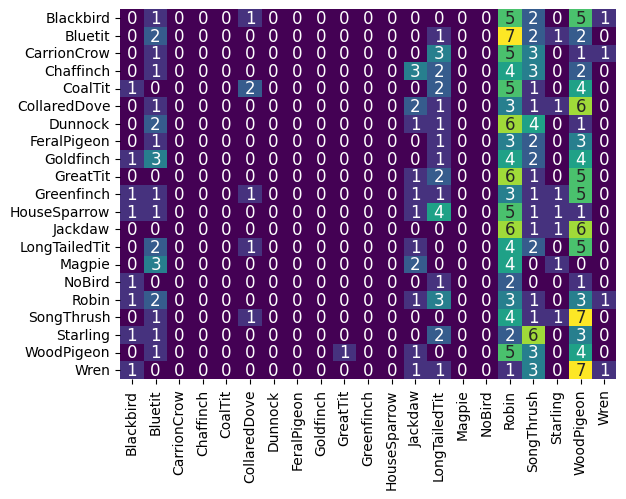

In [ ]:
draw_confusion_matrix(y_true, y_pred)

In [ ]:
test_bird_true = np.where(y_true == "NoBird", 0, 1)
test_bird_pred = np.where(y_pred == "NoBird", 0, 1)

# Assuming y_true and y_pred are the true and predicted labels for your data
# After label modification, y_true and y_pred should contain 1 for "NoBird" and 0 for other classes
accuracy = accuracy_score(test_bird_true, test_bird_pred)
balanced_accuracy = balanced_accuracy_score(test_bird_true, test_bird_pred)
print(accuracy)
print(balanced_accuracy)

0.9829351535836177
0.5


In [ ]:
mask = y_true != "NoBird"
test_true = y_true[mask]
test_pred = y_pred[mask]

# Assuming y_true and y_pred are the true and predicted labels for your data
# After label modification, y_true and y_pred should contain 1 for "NoBird" and 0 for other classes
accuracy = accuracy_score(test_true, test_pred)
balanced_accuracy = balanced_accuracy_score(test_true, test_pred)
print(accuracy)
print(balanced_accuracy)

0.03819444444444445
0.03666666666666667


# Test accuracy

We want to verify that the model has sufficiently high test accuracy on two classification tasks:

1. classify the image as NoBird if there is no bird displayed on it, and some bird class if there is a bird displayed on it.
2. classify the image by the species of the bird that is displayed on it.

The test accuracy per class is the number of True positives + True negatives divided by the number of images in the class

In [ ]:
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

# initialize the rest of the model

# What is the test accuracy after 2 epochs of training?

In [ ]:
classifier_2_epochs = load_model('/content/drive/MyDrive/Colab Notebooks/Mod5ProjectMachineLearningFiles/classifier_1')

In [ ]:
y_pred = classifier_2_epochs.predict(test_generator)

293/293 [==============================] - 954s 3s/step


In [ ]:
y_pred = np.argmax(y_pred, axis=-1)

In [ ]:
y_true = test_generator.classes

In [ ]:
d_labels = test_generator.class_indices
d_labels = {y: x for x, y in d_labels.items()}
y_true = np.array([d_labels[x] for x in y_true])
y_pred = np.array([d_labels[x] for x in y_pred])

In [ ]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, confusion_matrix
import seaborn as sns

def draw_confusion_matrix(true, preds):
    d_labels = test_generator.class_indices
    d_labels = {y: x for x, y in d_labels.items()}
    conf_matx = confusion_matrix(true, preds)
    sns.heatmap(
      conf_matx,
      annot=True,
      annot_kws={"size": 12},
      fmt='g',
      cbar=False,
      cmap="viridis",
      xticklabels=np.array([y for x, y in d_labels.items()]),
      yticklabels=np.array([y for x, y in d_labels.items()])
    )
    plt.show()

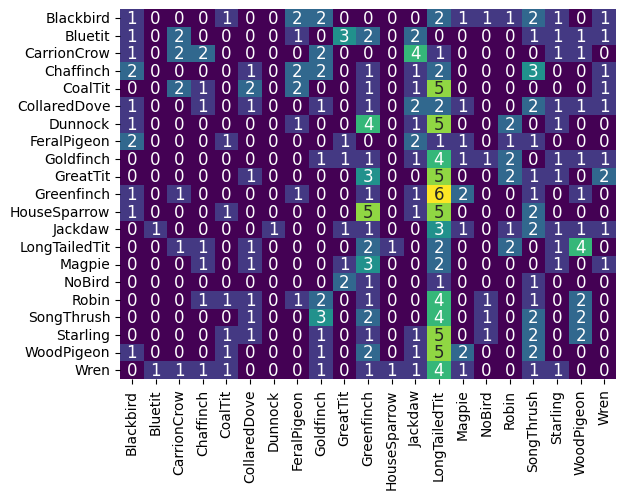

In [ ]:
draw_confusion_matrix(y_true, y_pred)

In [ ]:
test_true = np.where(y_true == "NoBird", 0, 1)
test_pred = np.where(y_pred == "NoBird", 0, 1)

accuracy = accuracy_score(test_true, test_pred)
balanced_accuracy = balanced_accuracy_score(test_true, test_pred)

print(accuracy)
print(balanced_accuracy)

0.9658703071672355
0.4913194444444444


In [ ]:
mask = y_true != "NoBird"
test_true = y_true[mask]
test_pred = y_pred[mask]

accuracy = accuracy_score(test_true, test_pred)
balanced_accuracy = balanced_accuracy_score(test_true, test_pred)

print(accuracy)
print(balanced_accuracy)

0.034722222222222224
0.03380952380952381


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


# K Fold Validation !!! NOT USED !!!

In [ ]:
from tensorflow.keras.metrics import BalancedAccuracy
from sklearn.model_selection import KFold

# Set the number of K-fold splits
n_splits = 5  # Adjust as needed

# Initialize K-fold cross-validation
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Data parameters (adjust as needed)
input_dim = ...
num_classes = ...

# Loop through the K-fold splits
for fold, (train_index, val_index) in enumerate(kf.split(train_generator)):
    print(f'Fold {fold + 1}')

    # Create a new model for each fold
    classifier = classifier()

    # Split the data for this fold
    train_data = np.array(train_generator)[train_index]
    val_data = np.array(train_generator)[val_index]

    # Train the model on the training data
    model.fit(train_data, validation_data=val_data)

    # Evaluate the model on the validation data
    results = model.predict(val_generator)

    print(f'Validation loss: {results[0]}, Validation balanced accuracy: {results[1]}')